# <span style="color:blue"> Esercitazione 02 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1  
(code Integrali.cpp)


### Scopo dell'esercizio

L'esercizio 1 chiede di stimare il seguente integrale:
$$I = \int_0^1 dx f(x) = \int_0^1 dx \frac{\pi}{2}\cos(\pi x/2) = 1$$
campionando dapprima in modo uniforme il dominio $[0,1]$ e, successivamente, utilizzando la tecnica dell'**importance sampling**.

### Descrizione del codice
Si è implementato ancora una volta un metodo a blocchi, generando $M=10^5$ numeri casuali divisi in $N=100$ blocchi, ovvero con $L=10^3$ numeri per ogni blocco. <p>
    
Per quanto riguarda il caso *uniforme* sono stati generati numeri casuali $x_i$ tra $[0,1]$ e, per ogni blocco $j$, si è calcolata una stima dell'integrale $I_j$ (e di $I_j^2$) valutando la funzione integranda su tali punti $ I_j=\langle f(x) \rangle = \frac{1}{L} \sum_{i=1}^{L} f(x_i) $. A partire da tutte le stime $I_j$ sono state calcolate e graficate le somme cumulative, con relativa incertezza, utilizzando la stessa procedura della prima esercitazione. <p>
    
L'implementazione del metodo dell'*importance sampling* richiede invece una discussione preliminare.
È necessario individuare una distribuzione di probabilità $d(x)$ che sia la più simile possibile a $f(x)$. Per far questo un primo tentativo potrebbe essere quello di considerare lo sviluppo in serie della funzione $f$, ovvero 
$$f(x) \simeq \pi/2 \biggl[ 1- \frac{1}{2}\biggl( \frac{\pi x}{2} \biggr)^2 \biggr] .$$
Questa funzione, come si evince nella figura sottostante, approssima bene $f(x)$ per piccoli valori ma si annulla in $x=\frac{2 \sqrt{2}}{\pi} < 1$, per cui non risulta sufficientemente simile su tutto il dominio. Una soluzione più efficiente potrebbe essere quella di considerare una funzione sempre parabolica del tipo $d(x)= A (1-x^2)$, massima in 0 e nulla in 1, che opportunamente normalizzata diventa
$$d(x)= \frac{3}{2} ( 1- x^2 ) .$$


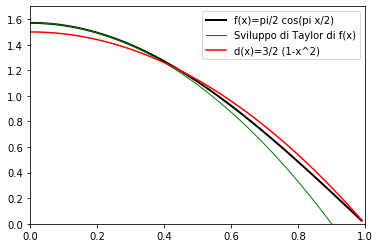

In [1]:
%matplotlib inline
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

x=arange(0,1,0.01)

y=zeros(100)
for i in range(100):
    y[i]= pi/2* cos(pi*x[i]/2)

taylor=pi/2*(1-0.5*(pi*x/2)**2)
d_x= 3/2*(1-x**2)

plt.figure()
plt.xlim(0, 1)    
plt.ylim(0, 1.7)
plt.plot(x,y, 'k-', linewidth=2, label='f(x)=pi/2 cos(pi x/2)')
plt.plot(x,taylor, 'g-', linewidth=1, label='Sviluppo di Taylor di f(x)')
plt.plot(x,d_x, 'r-', label='d(x)=3/2 (1-x^2)')
plt.legend()
plt.show()

$d(x)$, dunque, rappresenta la distrubuzione di probabilità scelta per l'importance sampling. Sono stati generati $M$ numeri casuali distribuiti in tal modo utilizzando una tecnica di rigetto. Con essi, per ogni blocco $j$ si è ottenuta una stima dell'integrale come $ I_j=\langle \frac{f(x)}{d(x)} \rangle = \frac{1}{L} \sum_{i=1}^{L} \frac{f(x_i)}{d(x_i)}  $ e si è proceduto identicamente al caso precedente per il calcolo delle somme cumulate.

### Analisi dati

Stima finale per N=100
Campionamento uniforme   I=  1.000153675 \pm 0.00145055
Importance sampling      I=  1.0000387182 \pm 0.000137243


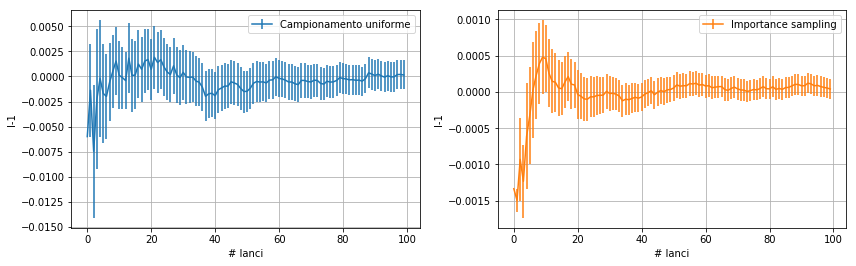

In [1]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

graph = genfromtxt('Integrale.dat')
fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='C0', label='Campionamento uniforme')
ax.set_xlabel('# lanci')
ax.set_ylabel('I-1')
ax.grid(True)
ax.legend()

ax = fig.add_subplot(122)
ax.errorbar(graph[:,0],graph[:,3], yerr=graph[:,4], color='C1', label='Importance sampling')
ax.set_xlabel('# lanci')
ax.set_ylabel('I-1')
ax.grid(True)
ax.legend()

print('Stima finale per N=100')
print('Campionamento uniforme   I= ',graph[-1,1]+1, '\pm', graph[-1,2])
print('Importance sampling      I= ',graph[-1,3]+1, '\pm', graph[-1,4])

plt.tight_layout()
plt.show()

Il grafico ottenuto è quantomai autoesplicativo. Calcolare l'integrale campionando la distribuzione $d(x)$ produce un risultato molto più vicino al valore vero rispetto a quanto ottenuto con campionamento uniforme e ciò è evidente guardando le scale dei valori ottenuti sull'asse y. Non solo, ma anche l'incertezza associata a questi dati è molto inferiore. Basta guardare gli errori relativi sulla stima finale, $\epsilon \sim 10^{-3}$ nel primo caso, $\epsilon \sim 10^{-4}$ nel secondo, ben un ordine di grandezza inferiore. La potenza dell'importance sampling è indubbiamente molto superiore rispetto al campionamento "standard" uniforme.

## <span style="color:blue"> Esercizio 2 
(code Randomwalk.cpp)


### Scopo dell'esercizio

In questo esercizio è richiesto di generare un Random Walk 3D con passo $a=1$, sia nel discreto sia nel continuo. Partendo dall'origine, il numero di step temporali da realizzare è $N_{st}=100$. È richiesto il calcolo delle fluttuazioni $\sigma = \sqrt{\langle r^2 \rangle}$ nei due casi e il suo confronto con l'andamento atteso $\sim\sqrt{N_{st}}$.

### Descrizione del codice

Il programma esegue $M=10^5$ simulazioni di random walks. <p>
Per il caso **discreto** la procedura implementata è stata la seguente:
1. al tempo $t=0$ la posizione del walker è l'origine $ \textbf{r}=(0,0,0)$, ovvero $r=0$;
2. per ogni step temporale $i=1,...,100$ si lancia un dado a 6 facce (ovvero si genera un intero casuale tra 0 e 5) e, a seconda dell'esito, si incrementa una delle tre coordinate di $+1$ o $-1$;
3. per ottenere una stima di $r^2$ gruppano le $M$ simulazioni in $N=100$ blocchi e per ciascuno di essi si calcola la norma quadra media di $\textbf{r}$, considerando l'esito finale del blocco come una singola misura;
4. implementando la blocking average, dal valor medio dei valori medi si ricava il $\langle r^2 \rangle$ con relativa incertezza;
5. si estrae la radice del valor medio, trovando $\sigma = \sqrt{\langle r^2 \rangle}$, mentre per ottenere l'incertezza si applica la propagazione della varianza: se $y=f(x)$ è una funzione di una variabile casuale $x$ allora
    $$ \sigma^2_y =  \biggl( \frac{d f(x)}{d x} \bigg|_{x=\langle x \rangle} \biggr)^2 \sigma^2_x .$$
Nel caso in questione $f(x)= \sqrt{x}$. <p>
    
Per il caso **continuo** l'unica differenza si ha nel punto 2. In questo caso, infatti, si campiona uniformemente l'angolo solido, generando due angoli, $\phi$ uniforme in $[0, 2\pi]$ e $\theta= \arccos(1-2x)$ ($x$ uniforme in $[0,1]$ ). Il nuovo punto in cui si sposta il walker è, in coordinate sferiche $(r=1,\theta, \phi)$. Una volta riportato in coordinate cartesiane, tutto procede come sopra descritto.

### Analisi dati

Si sono graficati i risultati ottenuti e fittati con una funzione radice $f(x)=A \sqrt{x}$ per verificare la compatibilità dei dati con l'andamento diffusivo atteso. Si ricorda che la *varianza* di un random walk generico di passo $a$ risulta pari a $N_{st} a^2$, pertanto ci si aspetta una stima del parametro $A \simeq 1$.

RW discreto, risultato del fit a radice y=A*x^0.5   A =  0.9987408765590061 \pm 8.506283120571006e-05
RW continuo, risultato del fit a radice y=A*x^0.5   A =  0.9999323402246518 \pm 8.677607656513785e-05


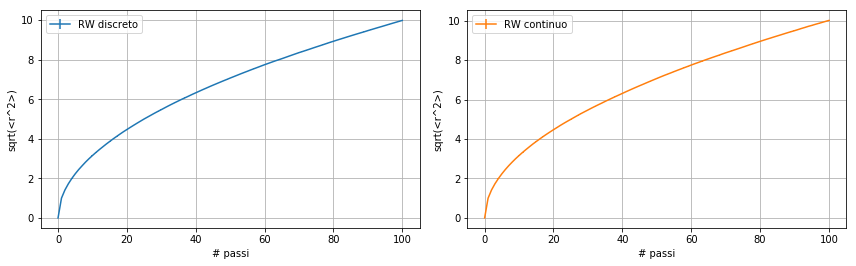

In [11]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit(x,A):  # Funzione di fitting
    return A * x**0.5

graph_a = genfromtxt('RW_discreto.dat')
graph_b = genfromtxt('RW_continuo.dat')
x=arange(0,101,1)

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.errorbar(x, graph_a[:,0], yerr=graph_a[:,1], color='C0', label='RW discreto')
ax.set_xlabel('# passi')
ax.set_ylabel('sqrt(<r^2>)')
ax.grid(True)
ax.legend()
p_opt, p_cov = curve_fit(fit, x, graph_a[:,0], bounds=(0,1.5)) #Fit della curva
print("RW discreto, risultato del fit a radice y=A*x^0.5   A = ", p_opt[0], "\pm" , sqrt(p_cov[0]))


ax = fig.add_subplot(122)
ax.errorbar(x, graph_b[:,0], yerr=graph_b[:,1], color='C1', label='RW continuo')
ax.set_xlabel('# passi')
ax.set_ylabel('sqrt(<r^2>)')
ax.grid(True)
ax.legend()
p_opt, p_cov = curve_fit(fit, x, graph_b[:,0], bounds=(0,1.5)) #Fit della curva
print("RW continuo, risultato del fit a radice y=A*x^0.5   A = ", p_opt[0], "\pm" ,sqrt(p_cov[0]))


plt.tight_layout()
plt.show()

Anche se non ben visibili sul grafico, le incertezze sui dati sono in linea con quanto ottenuto anche nelle altre simulazioni, con dispersione relativa $\epsilon \sim 10^{-3}$. Inoltre, i risultati ottenuti in entrambi i casi sono perfettamente sovrapponibili tra loro e compatibili con l'andamento a radice previsto. In entrambi i casi il fit ha prodotto una stima del parametro $A$ molto vicina a 1. Per la precisione, nel caso continuo $A$ è compatibile con 1 entro una deviazione standard, mentre nel caso discreto entro 2 sigma. Data la dimensione ridotta di tale incertezza, di un odg inferiore rispetto agli errori sulle misure ottenute dalla simulazione, questo fatto non dovrebbe rappresentare un grosso problema. <p>
Non è stata plottata la curva di fit solo per ragioni grafiche, in quanto risulterebbe totalmente sovrapposta ai dati simulati. 